In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [337]:
df = pd.read_csv('/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv')


In [338]:
display(df.head())
display(df.tail(20))

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
1898,11/09/2022,2040,4185,0,5374,0,27.0
1899,17/04/2021,3156,4913,0,6445,0,26.0
1900,27/01/2020,2396,3371,0,5185,0,0.0
1901,16/04/2024,13976,11549,391,19837,0,82.0
1902,12/02/2021,15506,8650,230,15651,5317,79.0
1903,04/04/2024,17209,10776,347,20138,5537,78.0
1904,01/11/2019,18179,12743,337,24242,5251,1.0
1905,25/11/2023,4233,6813,0,8613,0,32.0
1906,20/03/2024,18958,12303,411,21981,5823,88.0
1907,01/09/2024,2448,4364,0,6487,0,29.0


In [339]:
print(df.isnull().sum())
df['Other'] = df['Other'].fillna(df['Other'].mean())

Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64


In [340]:
df.isnull().sum()

,0
Date,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,0


In [341]:
cols = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
for col in cols:
    col_mean = df.loc[df[col] != 0, col].mean()
    df[col] = df[col].replace(0, col_mean)

In [342]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [343]:
df = df.set_index('Date')
df = df.sort_index()

In [344]:
df['Total'] = df[cols].sum(axis=1)


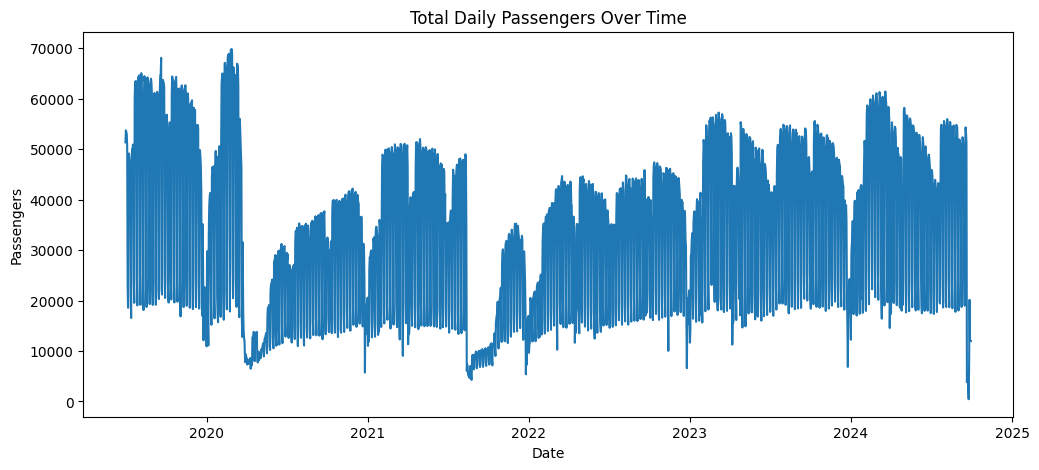

In [345]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Total'])
plt.title('Total Daily Passengers Over Time')
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.show()

In [346]:
train = df.iloc[:-30]
test = df.iloc[-30:]


In [347]:
train_df = pd.DataFrame({'ds': train.index, 'y': train['Total']})
test_df  = pd.DataFrame({'ds': test.index, 'y': test['Total']})

In [348]:
from prophet import Prophet
from prophet import Prophet

model = Prophet(
    weekly_seasonality=True,
    yearly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.8,
    seasonality_prior_scale=2.5,
    n_changepoints=50
)

model.fit(train_df)


In [349]:
future = model.make_future_dataframe(periods=7, freq='D')
forecast = model.predict(future)


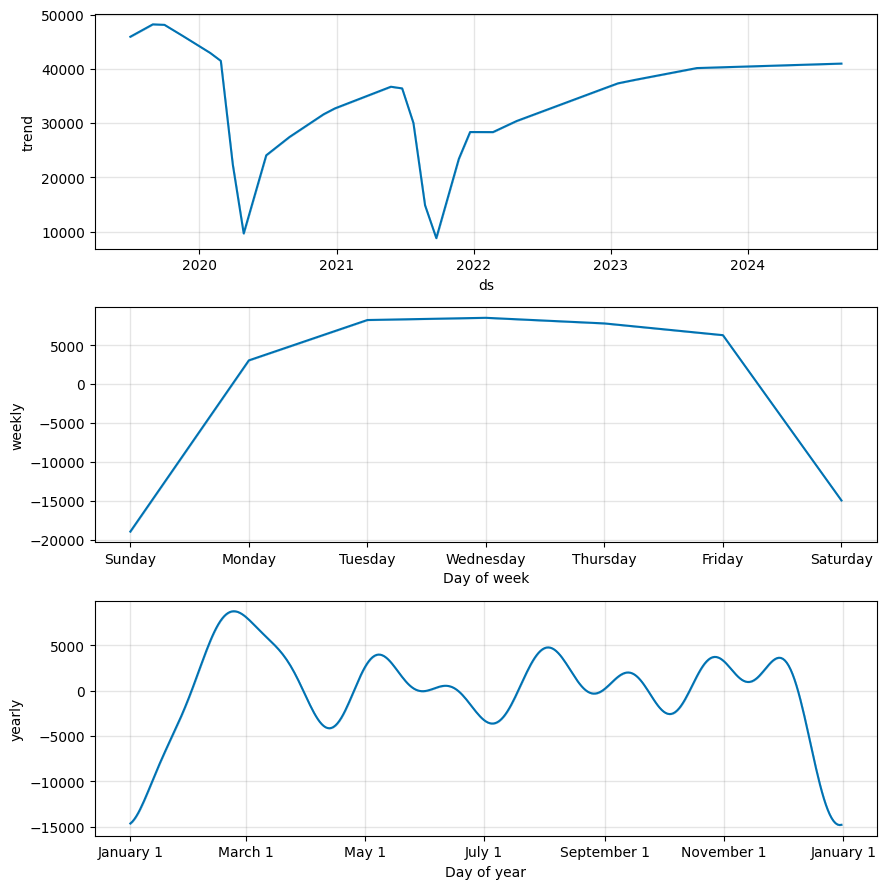

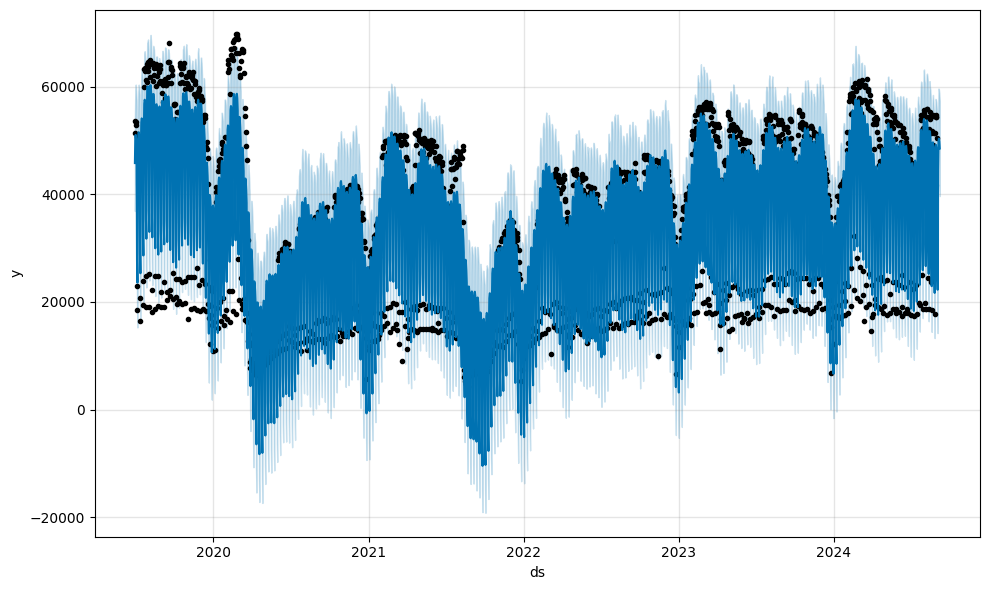

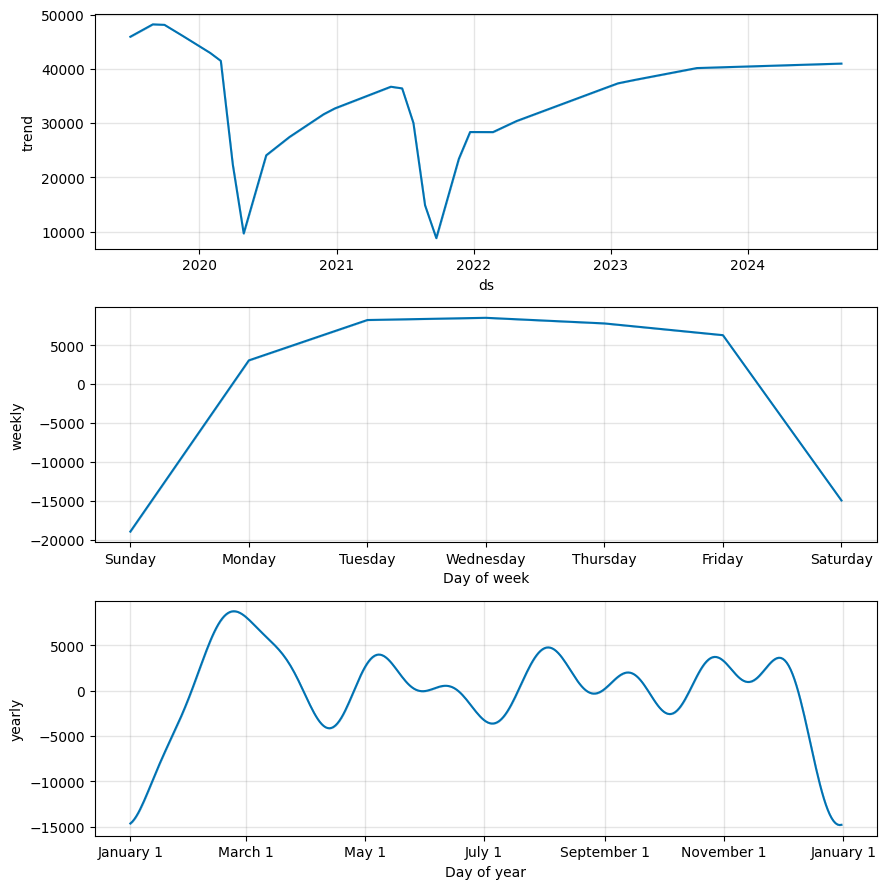

In [350]:
model.plot(forecast)
model.plot_components(forecast)


In [351]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

pred_test = forecast.set_index('ds').reindex(test_df['ds']).fillna(method='ffill')

mae = mean_absolute_error(test_df['y'], pred_test['yhat'])
rmse = np.sqrt(mean_squared_error(test_df['y'], pred_test['yhat']))


print("MAE:", mae)
print("RMSE:", rmse)


MAE: 18350.210895527434
RMSE: 25612.942457733596


/tmp/ipython-input-2751427808.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pred_test = forecast.set_index('ds').reindex(test_df['ds']).fillna(method='ffill')
